# Simple Linear Regression with Python

#### Introdução à Regressão Linear
A regressão linear é uma técnica estatística fundamental utilizada para modelar a relação entre uma variável dependente e uma ou mais variáveis independentes. Em sua forma mais simples, conhecida como regressão linear simples, a técnica busca encontrar a linha reta que melhor se ajusta aos dados, minimizando a soma dos quadrados das diferenças entre os valores observados e os valores previstos.

A equação da regressão linear simples é dada por:

𝑦 = 𝛽0 + 𝛽1𝑥

onde:

𝑦 é a variável dependente (o valor que queremos prever).

𝑥 é a variável independente (o preditor).

𝛽
0
 é o intercepto (o valor de 
𝑦
 quando 
𝑥
 é zero).

𝛽
1
 é o coeficiente de inclinação (a taxa de variação de 
𝑦
 em relação a 
𝑥
).

A regressão linear é amplamente utilizada em diversas áreas, como economia, engenharia, ciências sociais e biológicas, devido à sua simplicidade e interpretabilidade. Ela permite não apenas prever valores futuros, mas também entender a força e a direção das relações entre variáveis.

Neste artigo, exploraremos a aplicação da regressão linear simples utilizando Python, abordando desde a criação de um modelo até a avaliação de sua eficácia. Vamos mergulhar nos conceitos de resíduos, métricas de avaliação e visualização dos resultados para obter uma compreensão completa dessa poderosa ferramenta estatística.

In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [42]:
#Para o exemplo iremos considerar duas listas. A primeira presenta os valores de entradas (features) e a segunda os valores de saída (targe)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [28, 26, 35, 21, 33, 35, 41, 44, 42, 51]

# Criar um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

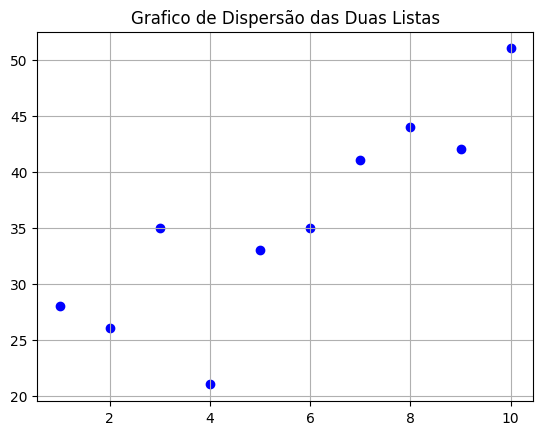

In [43]:
plt.scatter(data[['x']], data['y'], color='blue') 
plt.title('Grafico de Dispersão das Duas Listas') 
#plt.xlabel('X values')
#plt.ylabel('Y values') 
plt.grid(True)
plt.show()

### Matriz de correlação

Uma matriz de correlação é crucial para uma regressão simples porque ela ajuda a entender a relação entre as variáveis independentes (preditoras) e a variável dependente (resposta). Aqui estão algumas razões específicas:

Identificação de Relações Lineares: A correlação mede a força e a direção da relação linear entre duas variáveis. Uma alta correlação positiva ou negativa indica que as variáveis têm uma relação linear forte, o que é essencial para a eficácia de um modelo de regressão linear.

Seleção de Variáveis: Em um cenário com múltiplas variáveis preditoras, a matriz de correlação ajuda a identificar quais variáveis têm a maior correlação com a variável dependente. Isso pode orientar a seleção de variáveis para incluir no modelo de regressão, melhorando a precisão e a interpretabilidade do modelo.

Detecção de Multicolinearidade: A matriz de correlação também pode revelar multicolinearidade, que ocorre quando duas ou mais variáveis independentes estão altamente correlacionadas entre si. A multicolinearidade pode distorcer os coeficientes do modelo de regressão e dificultar a interpretação dos resultados. Identificar e tratar a multicolinearidade é crucial para construir um modelo robusto.

Avaliação de Suposições: A regressão linear assume que há uma relação linear entre as variáveis independentes e a variável dependente. A matriz de correlação ajuda a verificar essa suposição, garantindo que o modelo de regressão seja apropriado para os dados.


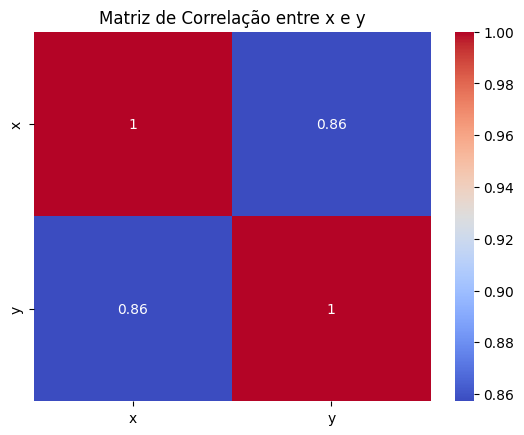

In [22]:
# Calcular a matriz de correlação
correlation_matrix = data.corr()

# Plotar a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre x e y')
plt.show()

### Modelo

In [44]:
# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(data[['x']], data['y'])

LinearRegression()

### Predições

In [45]:
# Fazer predições
predictions = model.predict(data[['x']])
data['predictions'] = predictions

# Fazer predições para novos valores
new_x = [11, 12, 13, 14]
new_predictions = model.predict([[11], [12], [13], [14]])

In [46]:
# Adicionar novas predições ao DataFrame
new_data = pd.DataFrame({'x': new_x, 'y': new_predictions})

In [47]:
# Concatenar os dados antigos e novos
all_x = data['x'].tolist() + new_data['x'].tolist()
all_predictions = data['predictions'].tolist() + new_data['y'].tolist()

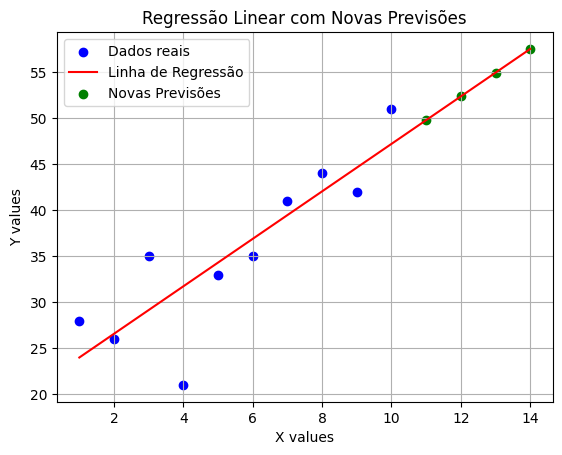

[49.8        52.38181818 54.96363636 57.54545455]


In [48]:
# Plotar os pontos e a linha de regressão
plt.scatter(data['x'], data['y'], color='blue', label='Dados reais')
plt.plot(all_x, all_predictions, color='red', label='Linha de Regressão')
plt.scatter(new_data['x'], new_data['y'], color='green', label='Novas Previsões')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Regressão Linear com Novas Previsões')
plt.legend()
plt.grid(True)
plt.show()

print(new_predictions)


### Como avaliar os Resultados

Vamos calcular as predições, os resíduos e as métricas de desempenho para avaliar a eficácia do modelo de regressão linear.

Predições: [23.98181818 26.56363636 29.14545455 31.72727273 34.30909091 36.89090909
 39.47272727 42.05454545 44.63636364 47.21818182]
Resíduos: 0     4.018182
1    -0.563636
2     5.854545
3   -10.727273
4    -1.309091
5    -1.890909
6     1.527273
7     1.945455
8    -2.636364
9     3.781818
dtype: float64
Mean Squared Error (MSE): 19.847272727272724
Mean Absolute Error (MAE): 3.4254545454545466
R-squared (R2): 0.7348039453865216


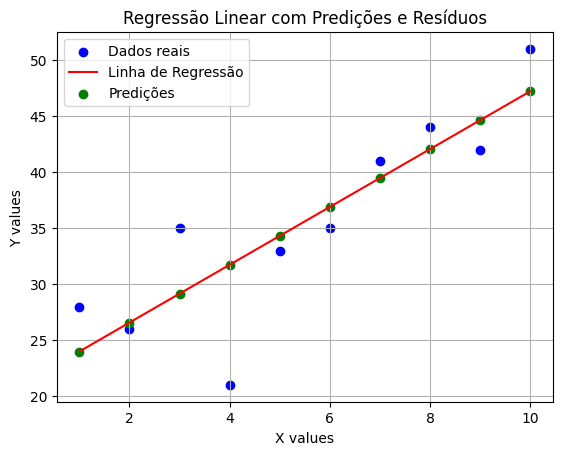

In [54]:
# Fazer predições
y_pred = model.predict(data[['x']])
data['predictions'] = y_pred

# Calcular resíduos
residuals = data['y'] - data['predictions']
data['residuals'] = residuals

# Avaliar o modelo
mse = mean_squared_error(data['y'], data['predictions'])
mae = mean_absolute_error(data['y'], data['predictions'])
r2 = r2_score(data['y'], data['predictions'])

print("Predições:", y_pred)
print("Resíduos:", residuals)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

# Plotar os pontos e a linha de regressão
plt.scatter(data['x'], data['y'], color='blue', label='Dados reais')
plt.plot(data['x'], data['predictions'], color='red', label='Linha de Regressão')
plt.scatter(data['x'], data['predictions'], color='green', label='Predições')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Regressão Linear com Predições e Resíduos')
plt.legend()
plt.grid(True)
plt.show()


#### Análise Detalhada dos Resultado

Avaliar a eficácia de um modelo de regressão é uma etapa essencial para entender como ele está performando em relação aos dados de entrada. Vamos analisar os resultados específicos de um modelo de regressão e interpretar as métricas obtidas.


#### Predições e Resíduos do Modelo

Resíduos, em termos de regressão linear, são as diferenças entre os valores observados (reais) e os valores previstos pelo modelo. Eles representam o erro de predição do modelo para cada ponto de dados. Em outras palavras, os resíduos mostram o quanto a linha de regressão se desvia dos pontos reais no gráfico.

Matematicamente, o resíduo para um ponto 
𝑖
 é calculado como:


𝑦
𝑖
−
𝑦
^
𝑖
onde:

𝑦
𝑖
 é o valor observado (real) do ponto 
𝑖
.

𝑦
^
𝑖
 é o valor previsto pelo modelo para o ponto 
𝑖
.

Os resíduos são importantes porque ajudam a avaliar a eficácia do modelo. Se os resíduos forem pequenos e distribuídos aleatoriamente, isso indica que o modelo está fazendo boas predições. No entanto, se houver grandes resíduos ou padrões nos resíduos, isso pode indicar que o modelo não está capturando bem a relação entre as variáveis.

Por exemplo, se você calcular os resíduos para os valores de 
𝑥
 de 1 a 10, você pode identificar quais pontos estão mais distantes da linha de regressão e, portanto, são considerados outliers. Esses pontos podem ter um impacto significativo na precisão do modelo e podem precisar de uma análise mais detalhada.


Após treinar um modelo de regressão, obtemos as seguintes previsões para 10 observações:
Predições: [23.98181818 26.56363636 29.14545455 31.72727273 34.30909091 36.89090909
 39.47272727 42.05454545 44.63636364 47.21818182]

Os resíduos, que são a diferença entre os valores reais e as previsões, são:

Resíduos:
0     4.018
1    -0.564
2     5.855
3   -10.727
4    -1.309
5    -1.891
6     1.527
7     1.945
8    -2.636
9     3.782

Esses resíduos mostram como o modelo se comporta em relação aos dados reais. Vemos que alguns pontos têm resíduos consideravelmente altos, como o terceiro ponto com -10,727, indicando uma grande discrepância. Isso sugere que o modelo teve dificuldade em prever corretamente esses valores específicos e que podem ser potenciais outliers.

#### Métricas de Desempenho do Modelo


Existem várias métricas importantes para a avaliação de modelos de regressão, e as mais comuns são:

1. **Erro Médio Absoluto (MAE - Mean Absolute Error)**:
   - **Definição**: A média dos valores absolutos dos resíduos.
   - **Interpretação**: Mede a distância média entre os valores reais e as previsões, independentemente de estarem acima ou abaixo da linha de tendência. O uso de valores absolutos garante que discrepâncias positivas e negativas não se anulem.
   - **Valor Ideal**: Quanto mais próximo de zero, melhor é a qualidade da previsão.

2. **Erro Quadrático Médio (MSE - Mean Squared Error)**:
   - **Definição**: A média dos quadrados dos resíduos.
   - **Interpretação**: É semelhante ao MAE, mas eleva ao quadrado as diferenças, atribuindo maior peso a grandes discrepâncias. Isso faz com que o MSE seja sensível a outliers.
   - **Valor Ideal**: Também é não negativo, e valores menores indicam uma melhor performance do modelo.

3. **Coeficiente de Determinação (R² - R-squared)**:
   - **Definição**: Uma métrica que compara o modelo atual com um modelo base que simplesmente prevê a média dos valores reais.
   - **Interpretação**: Indica a proporção da variância dos dados que é explicada pelo modelo. Um R² de 1 significa que o modelo prevê perfeitamente os dados, enquanto um R² de 0 indica que ele não explica nada além da média dos valores observados. Valores negativos são possíveis e indicam que o modelo é pior do que uma simples linha horizontal representando a média.


#### Vamos detalhar as métricas de avaliação calculadas para esse modelo:

**Erro Médio Absoluto (MAE):**

Resultado: 3.425

O MAE indica que, em média, as previsões do modelo diferem dos valores reais em aproximadamente 3,425 unidades. Isso nos diz que a precisão do modelo não é perfeita, mas o erro médio absoluto não é excessivamente alto, sugerindo uma performance moderada.

**Erro Quadrático Médio (MSE):**

Resultado: 19.847

O MSE é sensível a grandes discrepâncias devido ao uso de quadrados. O valor de 19,847 sugere que existem erros maiores contribuindo para essa métrica, como evidenciado pelo resíduo de -10,727. Esse valor destaca a presença de outliers que o modelo não está conseguindo prever com exatidão.

**Coeficiente de Determinação (R²):**

Resultado: 0.735

O R² de 0,735 indica que o modelo consegue explicar cerca de 73,5% da variabilidade dos dados. Em outras palavras, o modelo está capturando a maior parte das tendências dos dados, mas ainda há cerca de 26,5% da variabilidade que não é explicada. Isso pode indicar que o modelo pode ser melhorado, seja com mais dados, ajuste de hiperparâmetros ou com um modelo mais complexo.

#### Análise dos Resultados
Os resíduos apresentados mostram uma variação significativa entre algumas observações, o que pode ser um sinal de que o modelo pode ter dificuldades com certos padrões nos dados ou está sendo influenciado por outliers. Por exemplo, o resíduo de -10,727 mostra que há uma discrepância importante em uma das previsões, afetando o MSE mais do que o MAE, devido ao seu impacto quadrático.

O MAE nos fornece uma visão de erro médio absoluto e, embora seja informativo sobre o erro geral, o MSE nos alerta sobre os casos em que os erros são maiores. Um MSE consideravelmente maior que o MAE pode ser um indicativo de que existe uma ou mais previsões com erros substanciais, como foi observado.

O R² de 0,735 é um bom começo, mas não é excelente. Indica que o modelo tem potencial, mas ainda pode ser ajustado. Se o objetivo for uma previsão de alta precisão, seria interessante investigar os dados mais profundamente para identificar padrões não capturados pelo modelo atual ou considerar técnicas como a remoção de outliers ou o uso de modelos mais sofisticados (e.g., regressão polinomial ou modelos baseados em árvores).

#### Próximos Passos
Com base nesses resultados, algumas ações podem ser consideradas para melhorar o desempenho do modelo:

* Analisar Outliers: Identificar e lidar com os pontos que apresentam resíduos altos, como o -10,727, que pode estar distorcendo a performance geral.
* Ajuste de Hiperparâmetros: Revisitar os hiperparâmetros do modelo e verificar se ajustes podem melhorar o desempenho.
* Modelo Alternativo: Explorar modelos mais complexos, como Random Forest ou Gradient Boosting, que podem capturar relações não lineares nos dados.
* Feature Engineering: Criar novas variáveis ou transformar variáveis existentes para potencialmente melhorar a capacidade do modelo de capturar os padrões dos dados.

O objetivo é otimizar essas métricas para que o modelo seja mais confiável e tenha um desempenho melhor em novos dados.

#### Bibliografia
https://medium.com/@bloginnovazione/machine-learning-example-with-python-simple-linear-regression-54a37eeb41b5